# CMSC320 FINAL PROJECT
**Moses Kamoga**

## DOING SOME AND ANALYSIS AND PREDICTING THE PRICE OF A HOUSE IN WASHINGTON STATE

### INTRODUCTION

**The overall objective of this project is to analyze house data from the square footage to the location of a house to be able to better predict the price of a house in the state of washington, and not only give house buyers an estimate of what there budget should entail if they are looking to buy a house in a particular but also give them some useful information of where they get a house with in there budget in a great location.**

**Through out this tutorial we will fully analyze all the variables in this dataset and understand if they are highly significant in explaining the change in price of a house in washington state. We will also offer more insights in the data by looking at the most expensive and least expensice cities in washington state so that we can properly guide buyers and sellers altogether in their quest to manuever the real estate market in Washington. **

### 1. DATA COLLECTION

**The dataset used is got from kaggle and the link is here https://www.kaggle.com/shree1992/housedata#data.csv

**This dataset has 18 columns that is:- 

#### Date column.
The date which data was entered.

#### Price.
The price of the house.

#### Bedrooms
The number of bedrooms that a particular house has.

#### Bathrooms
The number of bathrooms that a house.

#### Sqft_living
The number of living square feet of a given house.

#### Sqft_lot
Is the size of a lot or floor space of the house.

#### Floors
The number of floors that a house has.

#### Waterfront
Indicates whether the house is a waterfront property or not. 
It is categorical variable 
with '0' indicating that the house is not a waterdront property 
and '1' indicating that the house is a waterfront property.

#### View
The number of views that the has. This is a continuous variable.

#### Condition
This indicates the condition that the house is in from 1 - 4. 
With 1 indicating that the house is not in a good condition and 4 being that the house is in a great condition.

#### Sqft_above
The square feet of the house above ground.

#### Sqft_basement
The square feet of the basement that is if a property has a basement. But, if the house has no basement then this variable is denoted by 0.

#### Yr_built
This is the year the house was built.

#### Yr_rennovated
This is the year the house was renovated.

#### street
This denotes the street the house is built on. 

#### city
The city where the particular house is found.

#### statezip
The denotes the state and the zipcode of a particular house.

#### country
This denotes the country in which the house is built.


## Background
I have always been fascinated with models that predict future trends. This fascination has overtime turned into an obsession and thus, i knew i always wanted to develop a model to predict future trends. Real estate being one of the most interesting businesses in terms of prediction. I wanted to try it out myself and develop a model that will predict the price of a house based on an existing dataset while maintaining, that factors such as the economy are stable. 
I am specifically taking into account factors that are directly tied to the house, not factors that are indirectly tied to the house such as all different crises like the inflation, natural disasters etc.

## Setting this up.
#### The response variable is price, and the independent variables are the other vraiables which are predictors and they will help us in analysing the flactuation of price in terms of the change in these variables. 

**Importing the dataset innto the turtorial for analysis**

We import the dataset file from kaggle by manual downloading it onto the local computer.
From the local computer we store the dataset which is a .csv in the folder where this notebook file is located. Then we use a pandas read_csv to read the file into the notebook to be able to carry out the analysis as shown. below.

In [1]:
!pip install lxml
!pip install html5lib
!pip install pydotplus
!pip install folium
import folium
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import requests
import lxml
import html5lib
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from PIL import Image
from urllib.request import Request, urlopen

In [2]:
#Importing the house price prediction dataset in our python project for analysis
df = pd.read_csv('data.csv')

In [3]:
#The number of rows in our dataset. 
print(df.shape)

(4600, 18)


I will be carrying out the analysis of data on 4600 rows. This is more than enough rows for us to be confident in our findings and the conclusion we will reach at the end of this tutorial.

In [4]:
#Below is how the table of the dataset looks like 
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

Our goal is to predict the future price of a house. Just by eyeballing the data. We can immediately see what columns we do not need in our analysis. We definitely do not need the date column. There is no way, it can make sense to use the date of the day the entry was entered to determine future house prices. The date column has to be eliminated from the dataset. 
Inspecting the dataset further, the country column is also not necessary. Since all the houses in the dataset are from the USA and more importantly the analysis we are doing is for houses sold in the USA. 
In conclusion, both the first column and last column which is date and country respectively, have to be deleted. 
I do not need to carry out any tests, common sense prevails here and does save me alot of time.

In [5]:
#deleting the first column from the dataset.
df = df.drop(['date'], axis = 1)

#deleting the last column from the dataset
df = df.drop(['country'], axis = 1)

#The new look dataset
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

                     street       city  statezip  
0      18810 Densmore Ave N  Shoreline  WA 98133  
1           709 W Blaine St    Seattle  WA 98119  
2  26206-26214 143rd Ave SE       Kent  WA 98042  
3           857 170th Pl NE   Bellevue  WA 98008  
4         9105 170th Ave NE    Redmond  WA 98052

From 18 columns we initially started with, we are now down to 16 columns. I will do the analysis on these 16 columns and from these, we will determine which variables are significant in explaining an increase or decrease in the price of the house.


## DATA VISUALIZATION
### checking for correlation between our response variable(price) and predictors.
Determining the correlation between the response variable and the predictors gives us an insight into what variables highly influence price.
Using the scatter plots we can tell if the variable is highly correlated with price.
With the scatter plot we can determine this, by eye balling the graphs and determining the level of correlation between the price and the variable. 

### Generating the scatter plots
I use matplotlib do generate the number of subplots that I want to create. In this instance below, I generate 3 columns and 5 rows of the sublots.
Now, i create an array and store all the column names of the dataset in the dataset. In this array comes in handy when i am generating the pivot tables that i will use to plot on the subplots. The pivot table have a y-axis of price which is the response variable and an x-axis of the variable that we get from the array, which obtained through iteration over the array.
with the pivot table when I execute data.pivot_table().plot(), this will populate the individual graphs as line scatter plots unless specified others in the attribute section.


<Figure size 432x288 with 0 Axes>

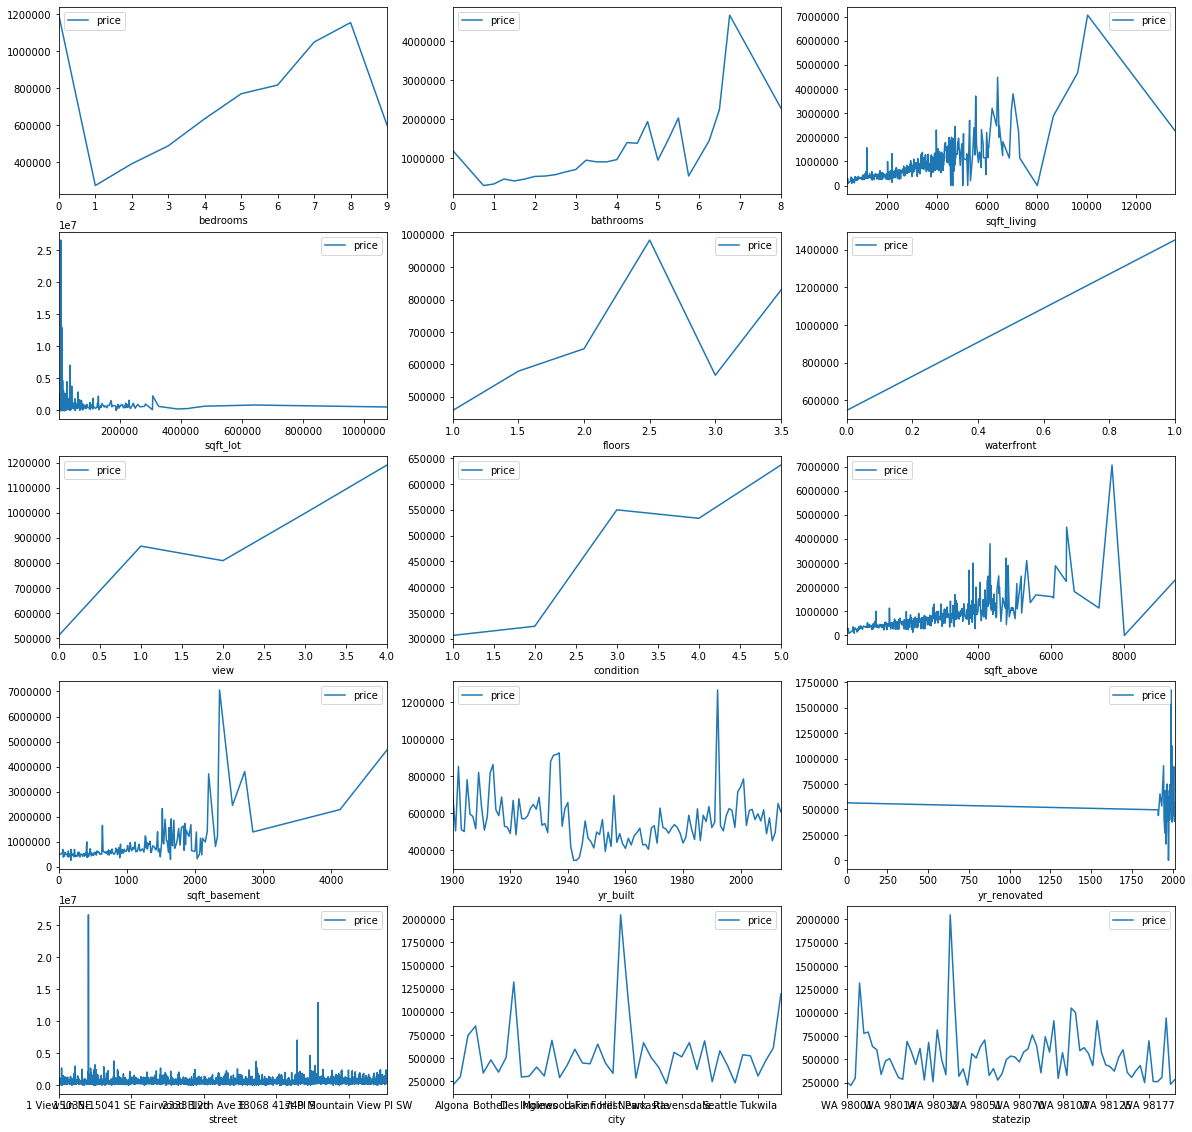

In [6]:
#making the scatter plots
fig = plt.figure()
#axis = df.plot(subplots=True)
fig, axis = plt.subplots(5, 3, figsize=(20, 20))

columns = []
for column in df.columns:
    if column == 'price':
        continue
    columns.append(column)

for i , ax  in enumerate(axis.flat):
    ##print(variable)
    if (columns[i] != 'price'):
        df.pivot_table('price', index=columns[i]).plot(ax = ax)

We learn alot about our data by just eyeballing the graphs. Dissecting the graphs one by one to get a better understanding of each variable with our response variable which is 'price'.

**1. price vs bedroom graph**

From this graph we can see that the price is high at 0 and then it decreases towards 1. From 1, increases and then from 9 and above it increases. This does not make sense at all. We expectant the price of a house to increase as the number of bedrooms increases. This abnormality can attributed to other factors such as the house being a waterfront property or located in a zipcode that is very expensive. Later in this tutorial we will be able to prove this.

**2. price vs bathrooms**

This graph almost behaves as the same way as the graph of price vs bedrooms. Having many bathrooms in the house does not necessarily mean that the price of the will go up. This can be attributed to the same factors as we discussed earlier in 'price vs bedroom'. We will analyse this in detail more and maybe our evidence or analysis will be support our conclusions here

**3. price vs sq_ft living, price vs sqft_lot graphs**

These also follow the same trend as the previous graphs. Later on we will be able to make final conclusions after doing more analysis that will help us solidify the fact that we know 

**4. price vs floor**

This graph follows the other graph where the number of floors does not necessarily mean that the price of the house will be high. Others do come into place like where the house is located and everything.

**5. price vs waterfront**

The more waterfront sides the house has, the more the price of the house is. We can see that is graph is highly correlated. It keeps rising as the price increase and the water front increases. We will prove this later on and the regression analysis we do onn this data should indicate a big positive coefficient to account for this steep rise of the line.

**6. price vs view**

This graph is not as steep as the 'price vs waterfront' but also is correlated with price. As the number of views increase the price of the house tend to increase though there a few instances where that is not case.

**7. price vs condition**

We all believe that the better the condition of the house, the higher the price is going to be. The graph clearly indicates that, if the condition of the house is good. Then it is going to cost a little more. There are a few instances that do not go with the norm but the regression later will enable us explain these descreparancies or abnormalities in our graph.

**8. price vs sqft_above, price vs sqft_basement.**

These graphs are not really clear if they are correlated with price. We do observe random spikes but, it does not tell me if there is a correlation. More analysis on this will definitely give us a clear picture of what is going on here. 

**9. price vs yr_built, price vs yer_renovated**

Both these graphs maybe not really correlate to price at all. This means that the year a house was built or rennovated may not have an affect on the price of the house. We can not really ascertain without doing extra tests but from eyeballing the graphs we can safely say that for now..

**10 price vs street, price vs city, price vs statezip**

Street, city and statezip are not numerical vartiables and thus just by eyeballing the graphs does not tell us anything about their relationship with the price of the house. We will need to do a lot more analysis and alot more visuals to clearly be able to say how price is influenced by the street the house is built on, the city in which the house is built, and the statezip where the house is located. 



### Lets do some regression on the data.

After eyeballinng the graphs above and making assumptions and conclusions off it, it is time to put the assumptions and the conclusions we made above to the test.
We will achieve this by running a linear regression on the dataset and with real proof, we can acertain that our assumptions or conclusions above are indeed true or it was a bunch of bullshit..haha
Also, this will help us in understanding the variables that we could not really say anything earlier how they affect price.
Before we do a regression on our data. We will remove three variables that is:- statezip, city and street as we have determined in the graphs above that the price of a house is influenced by the city, street and statezip it is located. With this we can sure that the location of the house affects the price of the house either positively of negatively. 

This is due to other factors that are not explained in the model such as, 
-if the neighbourhood is safe.
-if the neighbourhood has great schools.
-if the neighbourhood is in a prime location.
-the cost of living in the particular state, also does influence the price of the house. 
 If the cost of living is high, the house prices will too, be high and vice versa. 


I will do a regression on the rest of the variables to determine how significant they influence the price of a house. 

In [7]:
#Generating a regression model for the data.

newTable = df.copy()


#dropping the 3 variables 
newTable = newTable.drop(['street'],1)
newTable = newTable.drop(['city'],1)
newTable = newTable.drop(['statezip'],1)

result = sm.ols(formula="price ~ bathrooms + bedrooms + condition + floors + sqft_above + sqft_basement + sqft_living + sqft_lot + view + waterfront + C(yr_built) + C(yr_renovated) ", data=newTable).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     7.914
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          3.83e-161
Time:                        03:40:41   Log-Likelihood:                -66800.
No. Observations:                4600   AIC:                         1.340e+05
Df Residuals:                    4419   BIC:                         1.351e+05
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

### Dissecting the regression model above.
With the coefficients we can tell if a variable decreases or increases the price of a house, that is, with a negative coefficient, an increase in the units of the variable decreases the price of the house. And with the positive coefficient an increase in the units of the variable will lead to an increase in the price of the house.

From the model above, we can tell bathrooms, condition, floors, sqft_above, sqft_basement, sqft_living, view, waterfront, yr_renovated, these are significant in explaining an increase in the price of a house.

And, bedrooms and yr_built are significant in explaining the decrease in the price of a house. 
With yr_built, we can use our commonsense to understand and conclude that houses that are old or where built longtime are somewhat more expensive than the houses built recently.
Understanding why bedrooms negatively affect the price of the house, we could argue that houses in city center that is apartments with less bedrooms are more expensive than houses in the surburbs. Due to their(houses in the city) location which is very appealing to buyers.

Now, we look at the p-values. These values will enable us determine how significant the the variable is in explaining the change in the price of a house. 
If the p-value is approximately zero, this means that the variable is significant in explaining the change(increase or decrease) in the price of a house. From the model above, we can see that all the variables are significant in explaining the change(increase or decrease) in the price of a house except yr_rennovated. 


#### Moment of truth
###### Is this model significant in explaining the response in price?
To answer this question, we look at the R - squared. 
The value of R - squared is too small that thus, this model is not significant in explaining the response in price. 

To understand this, maybe the 3 variables, have influenced the low R - squared value.

#### Solution.
We fit a new model with all the original variables.

### New fitted model with all the variables.
Fitting a new model including the city, statezip and street.
In the previous model, we can also that the p_values for the year built and year renovated were too high and thus we can remove them from the newly fitted model. 
And the floors p_value is also too high and thus we remove it from the new model.
Plus we know, we know that statezip and city are not really needed since the street address of a house that provide that. 
So, the columns of city and statezip will be removed to eliminate of redundancy in our model. 
From the street address, we can derive city, state, and zipcode. 

In [8]:
#Copying the content of the dataset.
newModel = df.copy()

#fitting the new model without the variables floors, city and state with reasons given above but including street.
result_new_Model = sm.ols(formula="price ~ bathrooms + bedrooms + condition + sqft_above + sqft_basement + sqft_living + sqft_lot + view + waterfront + street ", data=newModel).fit()

print(result_new_Model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     11.79
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.41e-24
Time:                        03:42:05   Log-Likelihood:                -52072.
No. Observations:                4600   AIC:                         1.132e+05
Df Residuals:                      67   BIC:                         1.424e+05
Df Model:                        4532                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

#### Understanding this new model
**Good news!!!**

R-squared is 99% which is very high and thus shows that the model is significant is explaining the change in price.
This is what we were looking for, but we still have work to do since there are variables that have a high p-value.
If the p-value is not approximately zero then this signifies that particular variable is not significant in explaining the change in price.
Thus, we have to remove these variables to remain with only those variables that are significant in explaining the change in price.

Variables in question are:-

-waterfront which has a p-value of 0.117

-sqft_basement which has a p-value of 0.180

-condition which has a p-value of 0.969

-bedrooms which has a p-value of 0.932

The Adj. R-squared does account for the predictors that are not significant in explaining the change in the response variable.


#### Doing the F-partial test,
**Hypothesis**
null hypothesis, the original model with the variables waterfront, sqft_basement, condition, bedrooms is significant in explaining the change in price better than the small model. 

Alternative hypothesis, the new model without the variables waterfront, sqft_basement, condition, bedrooms is significant in explaining the change in price better than full model. 

**F-Partial test**
the p-value is approximately zero and thus we reject null hypothesis. 

Thus with this test, we can fit the new model (smaller model). 

#### Final model
We fit a final model with the varibles above removed. 

In [9]:
#Fitting the new model
newModelTable = df.copy()

result_NewModel_Table = sm.ols(formula="price ~ bathrooms + sqft_above  + sqft_lot + view + C(waterfront) + C(street)", data=newModelTable).fit()

print(result_NewModel_Table.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     12.04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.17e-25
Time:                        03:43:20   Log-Likelihood:                -52125.
No. Observations:                4600   AIC:                         1.133e+05
Df Residuals:                      70   BIC:                         1.425e+05
Df Model:                        4529                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In this model, R - squared is 99% which means that this model is significant in explaining the change in price.
Also, though there is no significant change in the Adj. R - squared but there is a slight increase of 0.2. 

## Regression equation for our model

Below is the equation for the model that can be used to predict the price of the house given the independent variables in the model.

**formular**
price_estimate = -4.768e+05 + b_0(street) - 1.512e+05(bathrooms) + 519.1622(sqft_above) + 53.2727(sqft_lot) 3.146e+05(view)

where:-

b_0 is the coefficient of the street where the house is located. 
    This is a categorical variable and thus it takes the coefficient of the street if the house is located on that 
    street.

### putting the model to the test.

We put this model to a test.

Below is a real listing of a house in seatle which has been on the market recently and has just got sold.
It was sold for 615,000 dollars.

Link for the listing --> https://www.zillow.com/homedetails/2022-24th-Ave-E-Seattle-WA-98112/49098189_zpid/?

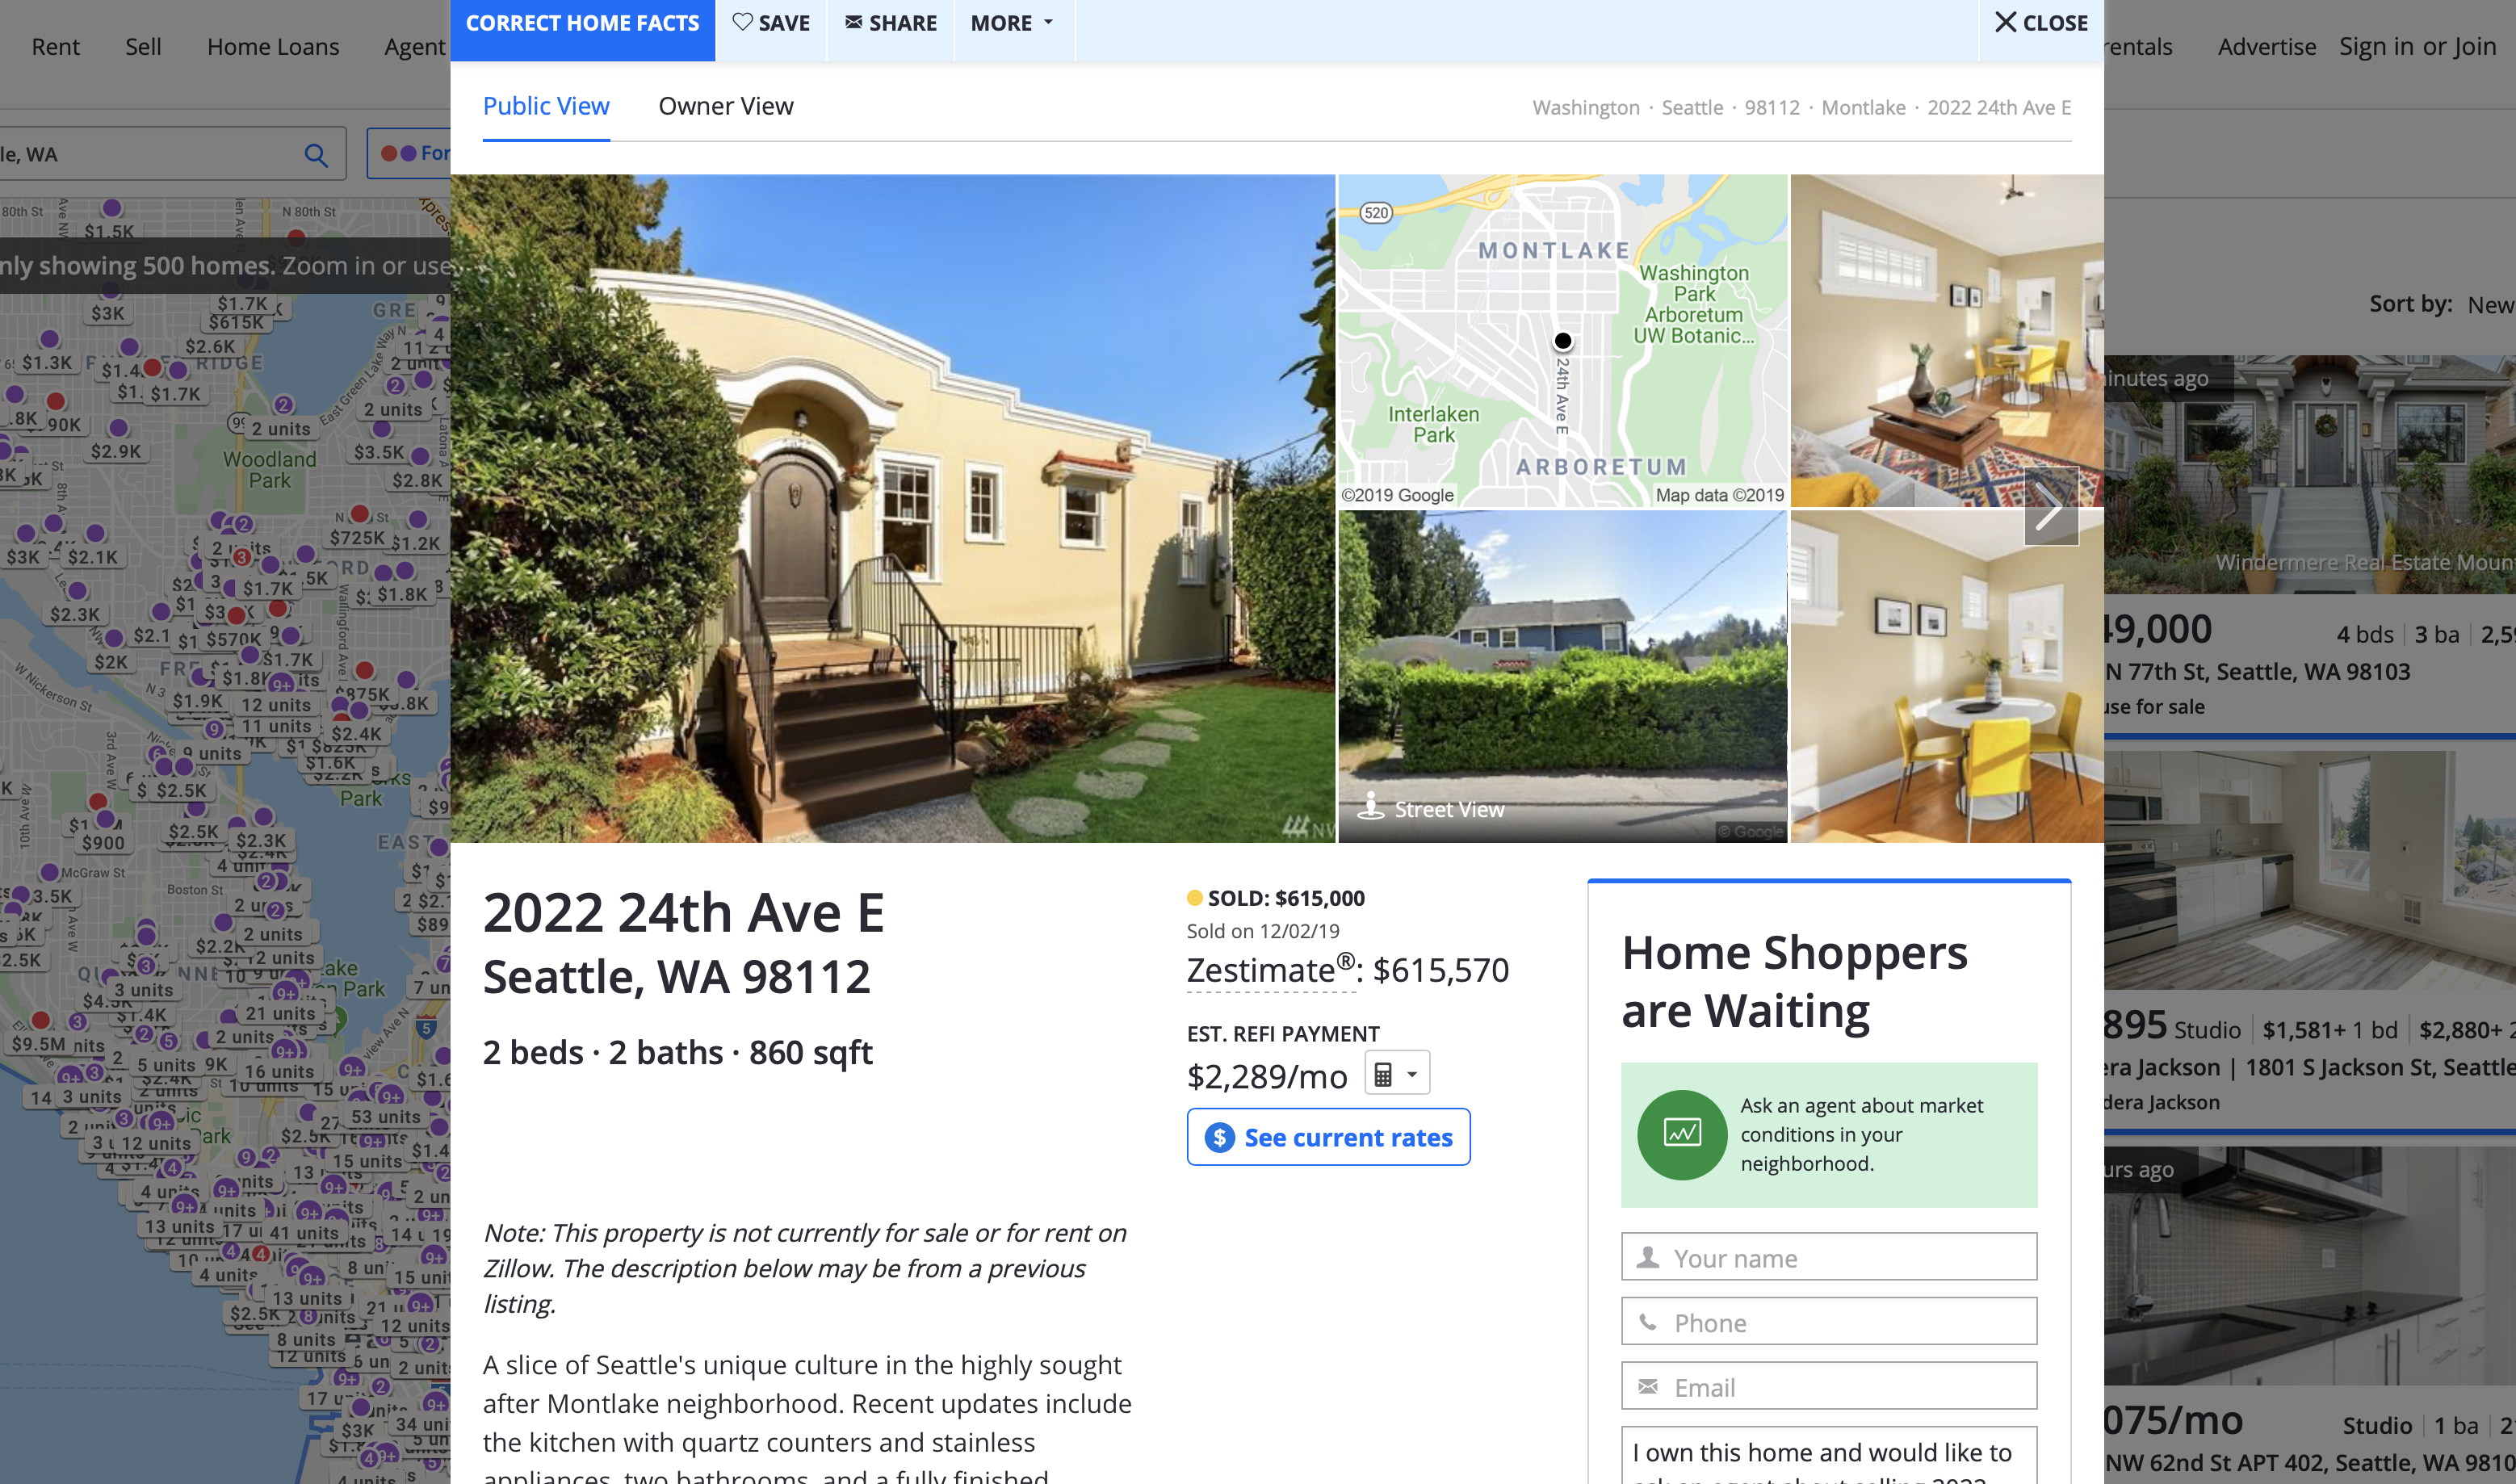

In [10]:
#Displayed is a real listing that has just sold on 2 december 2019
display(Image.open("Screen Shot 2019-12-09 at 1.14.19 PM.png"))

As pointed out earlier, with the listing we have the street, state, city and the zipcode of where the house was located.
From the formula above, we can plug in the variables from the listing..

The street is ---> 24th Ave E Seatle, WE 98112 and from the model the coefficient is ---> 6.979e+05

The number of bathrooms is ----> 2

Sqft_above ---> 430 this is calculated by subtracting the total sqft(860sqft) from the basement sqft(430sqft).

Sqft_lot ---> 3088

view ---> the number of views that the house has. And in this case, it is 1.

We plug these values into our formular to estimate the price of the house.

In [11]:
price = -4.768e+05 + (6.979e+05 * 1) - (1.512e+05 * 2) + (53.2727   * 3088) + (3.146e+05  * 1) + (519.1622 * 430)
print(price)

621045.8436


Our model **estimates** the **price** of the house to be **621045.8436**
The house actually sold for **615,000**
We can be confident in our model predicting the price of a house with a minimal error. 

In [12]:
#The difference of our model and the actual price the house went for is 
diff_price = 621045.8436 - 615000
print(diff_price)

6045.843600000022


The difference in the price is 6045.843600000022. 
So, we can be very confident that our model will give us an estimate of the price with a very minimal error.

## Exploring the top most expensive cities in Washington state.

From our data after predicting the price of a house in a seatle. We will look at the most expensive cities to live, in seatle. We will do this by adding the total price of houses in a city. 
This can be achieved by using groupby and an aggregate function of sum. This adds all the prices of houses in a give city and the result is the city and the total price of all the houses in that city from our dataset. 

In [13]:
#aggregating the price of the houses in a given city
sum_Price_Per_City = df.groupby(['city'])['price'].agg('sum').reset_index()

#sum_Price_Per_Street = sum_Price_Per_Street[['CITY','TOT_HOUSE_PRICES']]

sum_Price_Per_City.columns = ['CITY','TOT_HOUSE_PRICES']
#displaying oonly 20 cities here!
sum_Price_Per_City.head(20)

CITY  TOT_HOUSE_PRICES
0                Algona      1.036440e+06
1                Auburn      5.268392e+07
2    Beaux Arts Village      7.450000e+05
3              Bellevue      2.422937e+08
4         Black Diamond      3.056450e+06
5               Bothell      1.588758e+07
6                Burien      2.582210e+07
7             Carnation      1.119254e+07
8            Clyde Hill      1.454140e+07
9             Covington      1.273791e+07
10           Des Moines      1.768957e+07
11               Duvall      1.696775e+07
12             Enumclaw      8.613208e+06
13            Fall City      7.619500e+06
14          Federal Way      4.290338e+07
15  Inglewood-Finn Hill      4.250000e+05
16             Issaquah      1.114826e+08
17              Kenmore      2.953461e+07
18                 Kent      8.130610e+07
19             Kirkland      1.218461e+08

#### Histogram to help us visualize how much houses cost in different cities in seatle.

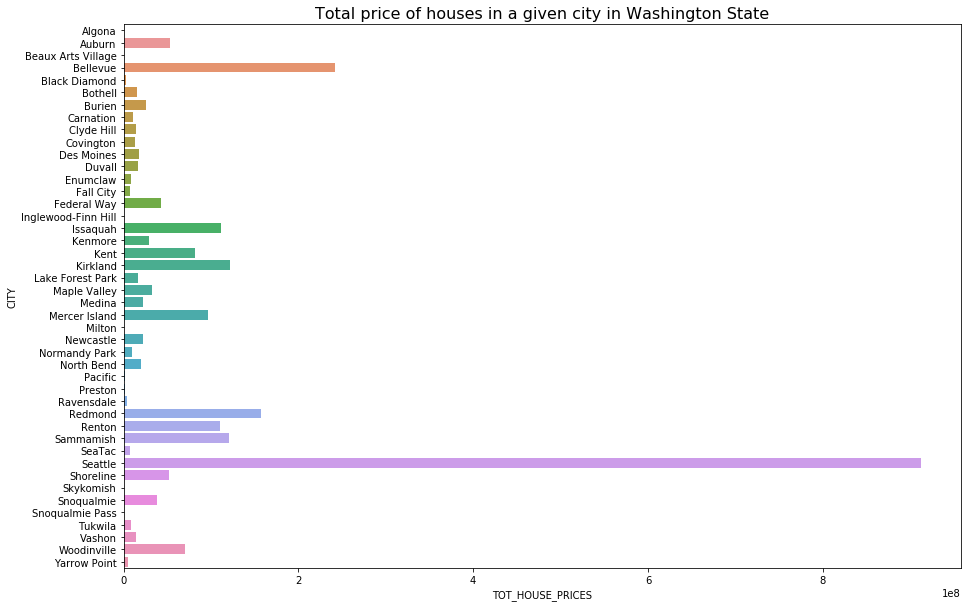

In [14]:
#graphing the histogram
plt.figure(figsize=(15,10))
plt.title("Total price of houses in a given city in Washington State", fontsize=16)
sns.barplot(data=sum_Price_Per_City, x='TOT_HOUSE_PRICES', y='CITY')
plt.show()

### Analysing the histogram.

From the histogram we can immediately observe the disparities in income distribution among the washington state population.
Looking at the histogram, Seattle by far has the highest total price of houses. This can be attributed to the booming technology sector in that area. Where big tech giants, the likes of Amazon and Microsoft that are headquartered in the area have led to exorbitant house prices. 

From a seatle times online editorial authored by Rosenberg, the prices of houses in Seattle are expected to even go higher with a looming Amazon second HQ. 
The only city that tries to come close to seatle is Believue. And this can also be attributed to Amazon because Believue was the first HQ of Amazon before they moved to seatle. 
Amazon still maintained a presence in Believue and according to the Business insider article authored by chan, "Amazon is inching its way back to its original home city". They are planning to build there tallest tower in that city and move all there world wide operations there.

This means that, now is the right time to buy property in Believue before everything goes crazy like what happened in seatle. As a buyer looking to buy property in washington state, even though the prices are a little bit high Believue will be a good buy because the future looks bright. And if you are planning to sell living in that area, my advise will be to hold onto your house and wait for the rainfall that is, Amazon's second coming.

### Lets find the most expensive neighbourhoods/streets in seatle

Given that Seattle by far is way more expensive than all the other cities in Washington state. Lets explore the expensive and cheap neighbourhoods in that city. That is, if someone really wanted to buy a house in seatle. What neighbourhoods or streets should they look at it, that they can afford.

To plot the histogram to enable us visualize and also understand different pricing of houses on different streets in seatle.
We will extract all the rows that have the column 'city' == Seattle from the dataset.
Then we will pretty much carry out the calculations the same way we did when we were trying to find out total price of all houses in washington state grouped by city. But, this time we will group by street.

#### organising the data
Given, there is alot of streets in Seattle. Having every street on the historgram will not enable us fully analyze the average prices on every street and make informed decisions. So, we will plot the top 75 most expensive streets/neighbourhoods in Seatle. 
We will sort the values in ascending order and then get the top 75 most expensive streets(streets with a high average price) and these are the ones we will plot on the histogram for analysis.

In [15]:
#Extracting the rows where city = Seattle from the datatset
seatle_Streets_Table = df[(df['city'] == 'Seattle')]


sum_Price_Per_Street = seatle_Streets_Table.groupby(['street'])['price'].agg('mean').reset_index()

sum_Price_Per_Street.columns = ['Street','AVG_HOUSE_PRICES']

#sorting the values in descending so that we ca get the top 75. 
sorted_Price_Per_Street = sum_Price_Per_Street.copy().sort_values('AVG_HOUSE_PRICES', ascending=False)

#table for the top 75 most expensive streets in Seattle.
top_75 = sorted_Price_Per_Street.head(75)
top_75.head()

Street  AVG_HOUSE_PRICES
1027    5426 40th Ave W      1.289900e+07
194   1230 Warren Ave N      3.200000e+06
234   1291 NW Elford Dr      2.888000e+06
580     2826 21st Ave W      2.560498e+06
903    4437 55th Ave NE      2.555000e+06

### Histogram to help us visualize the average prices of houses by street in seatle.

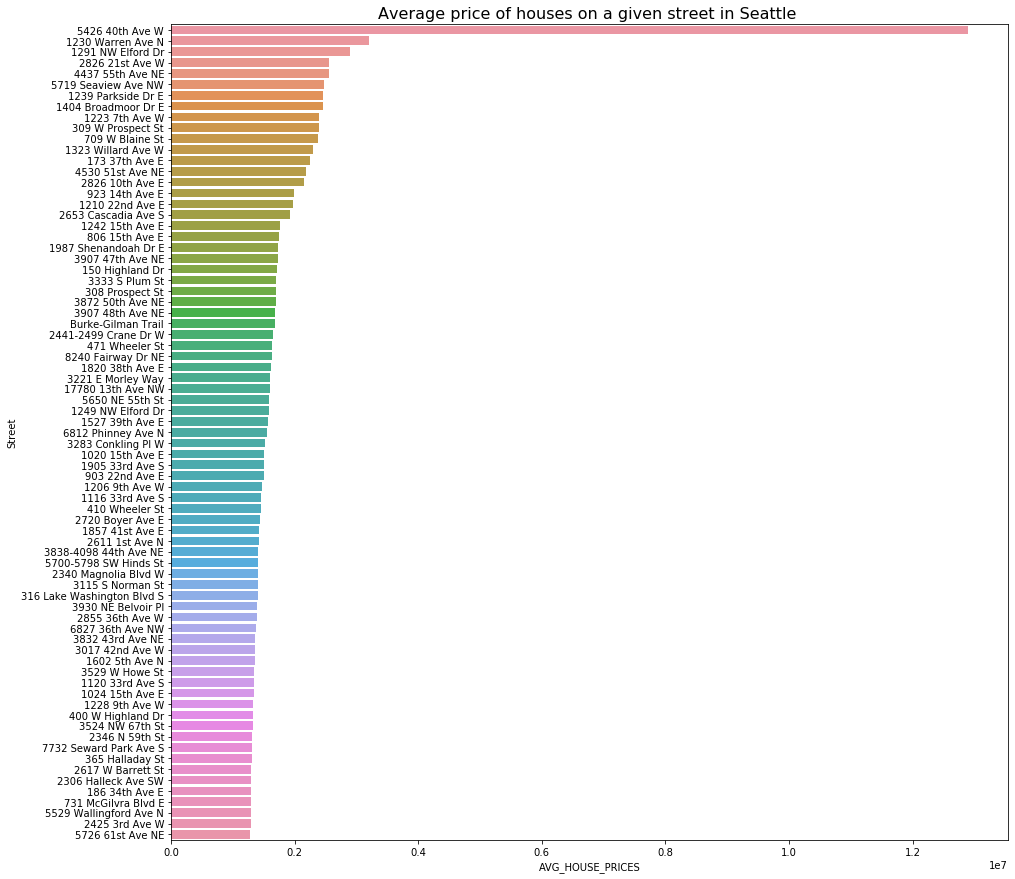

In [16]:
plt.figure(figsize=(15,15))
plt.title("Average price of houses on a given street in Seattle ", fontsize=16)
sns.barplot(data=top_75, x='AVG_HOUSE_PRICES', y='Street')
plt.show()

From the histogram, we can observe that the street with the highest average price of a house is 5426 40th Ave W. The average price is well above 1.2 and it is astronomically higher than the street with the second most high average price.
This does indicate the income inequality between various streets of seattle. Where one neighbourhood has astronomically high prices than the other. 